In [60]:
from pydataset import data
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [94]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different 
# for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a 
# standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 
# days and a standard deviation of 20 days. Use a .05 level of significance.
#Office 1 
mean1 = 90 
std1 = 15 
sample1 = 50

#Office 2
mean2 = 100 
std2 = 20 
sample2 = 50

a = .05

null_hypo = 'There is no significant change in averge time to sell homes between the two offices'
alt_hypo = 'There is a difference in the average time it takes to sell a home between each office'
confidence_level = .95
a = 1 - confidence_level

from scipy.stats import ttest_ind_from_stats
t, p = ttest_ind_from_stats(mean1= 90, std1=15 , nobs1=50 , mean2=100 , std2=20 , nobs2=50)

if (p/2) < a:
    print("Reject the null hypothesis")
else: 
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


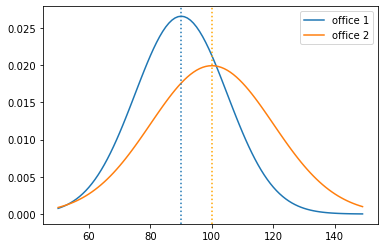

In [89]:
# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

In [96]:
# Load the mpg dataset and use it to answer the following questions:
mpg = data('mpg')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [97]:
#Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1) 
#(use hmean (Harmonic mean) when working with rates that average over equal distances)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [99]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [115]:
print(f'''
Because p ({p:.3f}) > alpha (.05), we fail to reject the null\
 hypothesis that there is no difference in fuel-efficency in cars\
 from 2008 and 1999.
''')


Because p (0.000) > alpha (.05), we fail to reject the null hypothesis that there is no difference in fuel-efficency in cars from 2008 and 1999.



In [101]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

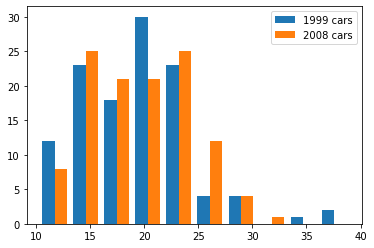

In [102]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

In [104]:
#Are compact cars more fuel-efficient than the average car?
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

t, p = stats.ttest_1samp(fe_compact, μ)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [106]:
print(f'''
Because p/2 ({p/2:.12f}) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.
''')


Because p/2 (0.000000000781) < alpha (.05), we reject the null hypothesis that there isno difference in fuel-efficiency between compact cars and the overall average.



In [109]:
#Do manual cars get better gas mileage than automatic cars?
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

t, p = stats.ttest_ind(fe_manual, fe_auto)
t, p

(4.652577547151351, 5.510464610044005e-06)

In [110]:
print(f'''
Because p/2 ({p/2:.6f}) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
''')


Because p/2 (0.000003) < alpha (.05), we reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars



In [112]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Is mileage different by transmission type?')

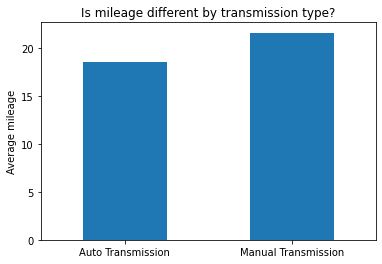

In [113]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')